<a href="https://colab.research.google.com/github/Quang-Nguyen-Van/MSE-PYTHON/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cài đặt version 3.5.2 của Matplotlib**

In [1]:
!pip install -U matplotlib==3.5.2
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Kiểm tra version của Matplotlib. Nếu là version cũ thì reset runtime để load lại version mới được cài đặt**

In [2]:
import matplotlib
mlt_ver = matplotlib.__version__
print(mlt_ver)

if mlt_ver != '3.5.2':
  exit()

3.5.2


In [3]:
#!pip uninstall gdown -y && pip install gdown
!rmdir dataset
!mkdir dataset
!gdown https://drive.google.com/uc?id=17QFqGgzv5bNx8JtyXzkaHUjCXUP84XLK -O /content/dataset/train.csv


rmdir: failed to remove 'dataset': Directory not empty
mkdir: cannot create directory ‘dataset’: File exists
Downloading...
From: https://drive.google.com/uc?id=17QFqGgzv5bNx8JtyXzkaHUjCXUP84XLK
To: /content/dataset/train.csv
100% 2.13M/2.13M [00:00<00:00, 28.8MB/s]


In [4]:
!rmdir trained_models
!mkdir trained_models

!gdown --folder https://drive.google.com/drive/folders/1lHDQo8ofMdKpa7rLQBrQ8QssbwAEVgA1?usp=sharing -O /content/trained_models

rmdir: failed to remove 'trained_models': Directory not empty
mkdir: cannot create directory ‘trained_models’: File exists
Retrieving folder list
Processing file 1JWIbJuMpJxu9ihdCxmlTHnwZ5kwiZXRH trained_model_spacked_ltsm_technical0.h5
Processing file 1tEThkI2MpiZETirTgzD_wzwDRgv9Fk6X trained_model_spacked_ltsm_technical1.h5
Processing file 1dYyNB9FNRuZ9PDrXZm_-lBTmsbfaoV-c trained_model_spacked_ltsm_technical2.h5
Processing file 1uHxhqNJ8_R0hNcmuJk8t-pbGJwC5SCKW trained_model_stacked_ltsm_furniture0.h5
Processing file 1_wjzg1pNRLQf_wFQsL_2Aa55ylh55nbx trained_model_stacked_ltsm_furniture1.h5
Processing file 1fl59n5FT2Xq0vUC2UdN5B2IIGCBCXWtO trained_model_stacked_ltsm_furniture2.h5
Processing file 1yqRS_YMCGGDHmtzaBDX4DrpvBpYkMJcG trained_model_stacked_ltsm_furniture3.h5
Processing file 1UlkXu7bKNS8-LQ0BK2F9IyWgDo9AJn2P trained_model_vanilla_ltsm_furniture0.h5
Processing file 12aXbFm5UvphA96HaU8Nhi_4Br43avY4A trained_model_vanilla_ltsm_furniture1.h5
Processing file 1iFG8nvj3WwYk7YwLmF

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import math
import os.path
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
from pandas import Series

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tools.eval_measures import rmse


In [6]:
d_frame = pd.read_csv('/content/dataset/train.csv')

In [7]:
d_frame.isnull().sum().sort_values(ascending = False)

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [8]:
d_frame[d_frame['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [9]:
d_frame['Postal Code'] = d_frame['Postal Code'].fillna('L7L 0A1')
d_frame['cnt'] = 1

In [10]:
d_frame.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
cnt              0
dtype: int64

#**Chuẩn hóa ngày tháng**

In [11]:
d_frame['Order Date'] = pd.to_datetime(d_frame['Order Date'], format= '%d/%m/%Y')
d_frame['Ship Date'] = pd.to_datetime(d_frame['Ship Date'], format= '%d/%m/%Y')

d_frame['Ship Date'].value_counts()

2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-09-15    30
2018-09-06    30
              ..
2015-07-10     1
2016-03-29     1
2016-06-14     1
2018-01-10     1
2016-05-13     1
Name: Ship Date, Length: 1326, dtype: int64

#**Biểu đồ thể hiện biến động doanh số theo tháng**

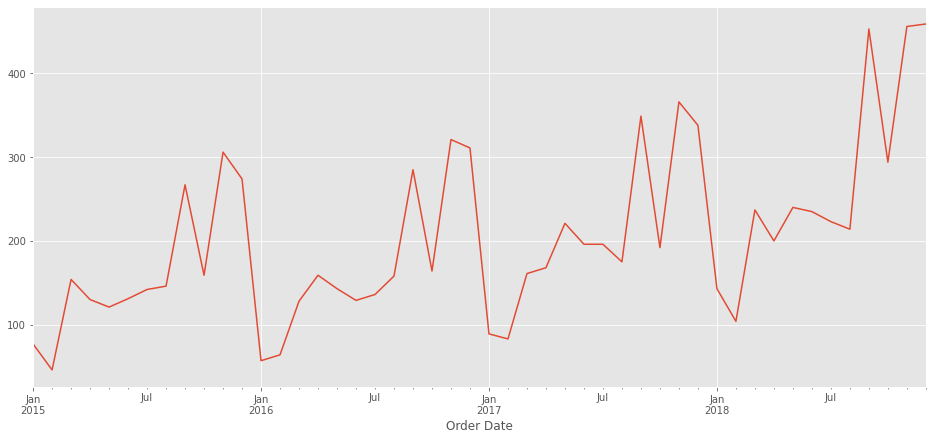

In [12]:
data = d_frame[['Order Date','cnt']]
data = data.sort_values('Order Date')
data = data.groupby('Order Date')['cnt'].sum().reset_index()
data = data.set_index('Order Date')

monthly = data['cnt'].resample('MS').sum()
monthly.plot(figsize = (16, 7))
plt.show()


#**Doanh số trung bình trong 3 tháng gần nhất**

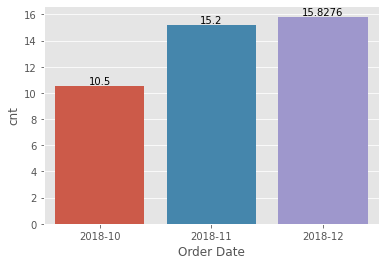

In [13]:
threeMonth = data['cnt'].resample('MS').mean()[-3:]

threeMonth = threeMonth.reset_index()
threeMonth['Order Date'] = pd.to_datetime(threeMonth['Order Date']).dt.strftime('%Y-%m')
ax = sns.barplot(x = threeMonth['Order Date'], y = threeMonth.cnt, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.show()


#**Doanh số bán hàng theo quý và quý có tổng doanh số cao nhất**

Order Date
2015Q1     277
2015Q2     382
2015Q3     555
2015Q4     739
2016Q1     249
2016Q2     431
2016Q3     579
2016Q4     796
2017Q1     333
2017Q2     585
2017Q3     720
2017Q4     896
2018Q1     484
2018Q2     675
2018Q3     890
2018Q4    1209
Freq: Q-DEC, Name: cnt, dtype: int64


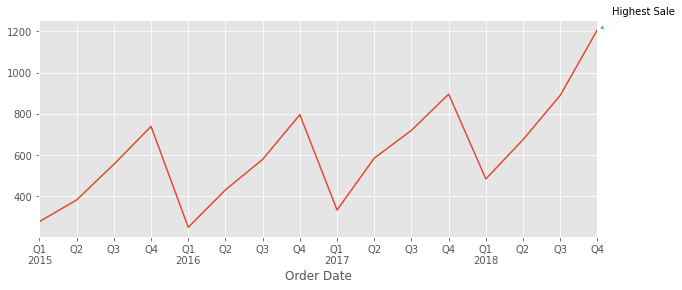

In [14]:
data = d_frame.copy()
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.strftime('%Y-%m-01')
F = data.groupby(['Order Date'])['cnt'].sum().sort_index(ascending=True)  
F = pd.DataFrame(F)
F.index = pd.to_datetime(F.index)

Q = F.groupby(F.index.to_period('Q'))['cnt'].sum().sort_index(ascending=True)
ax = Q.plot(figsize=(10,4))
Q.index = pd.Index(Q.index)
ticks = F.index[F.index.month%3 == 1]
labels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1
          else f'Q{int(ts.month/3)+1}' for ts in ticks]

ax.set_xticks(ticks)
ax.set_xticks(Q.index, minor=True)
ax.set_xticklabels(labels)
print(Q)
ax.annotate('Highest Sale',
             (Q.index[-1], Q.values[-1]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'));


#**Thời gian giao hàng trung bình theo tháng**

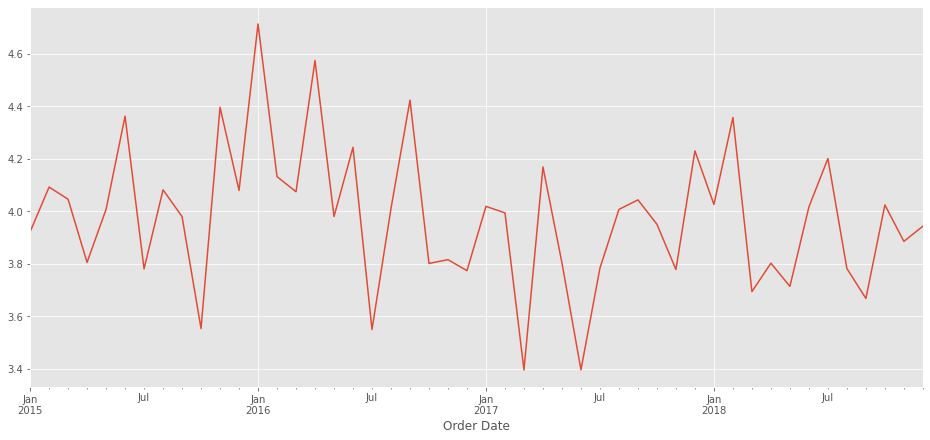

In [15]:
data = d_frame[['Order Date','Ship Date']]
data['Ship Time'] = (data['Ship Date'] - data['Order Date']).dt.days
data = data.sort_values('Order Date')
data = data.groupby('Order Date')['Ship Time'].mean().reset_index()
data = data.set_index('Order Date')

monthly = data['Ship Time'].resample('MS').mean()
monthly.plot(figsize = (16, 7))
plt.show()


#**Sức mua theo từng thành phố**

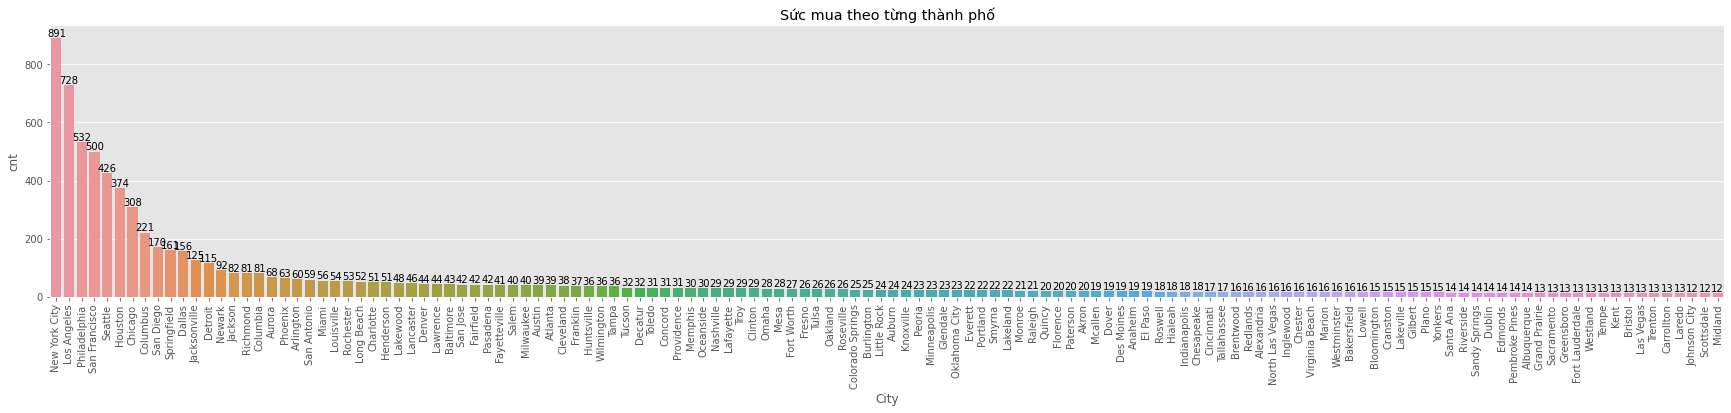

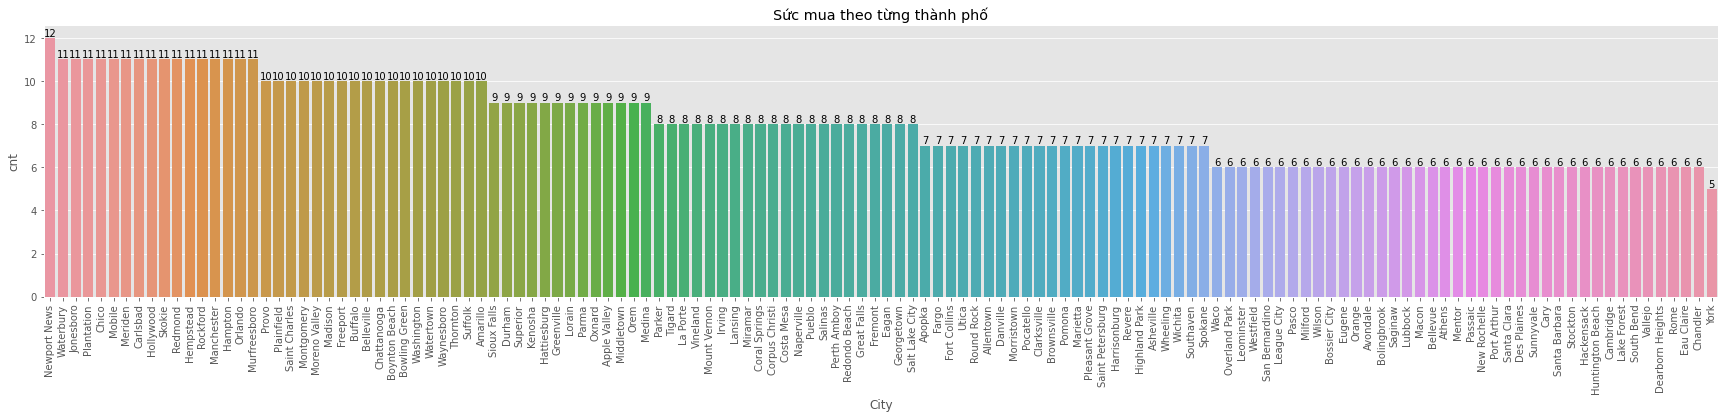

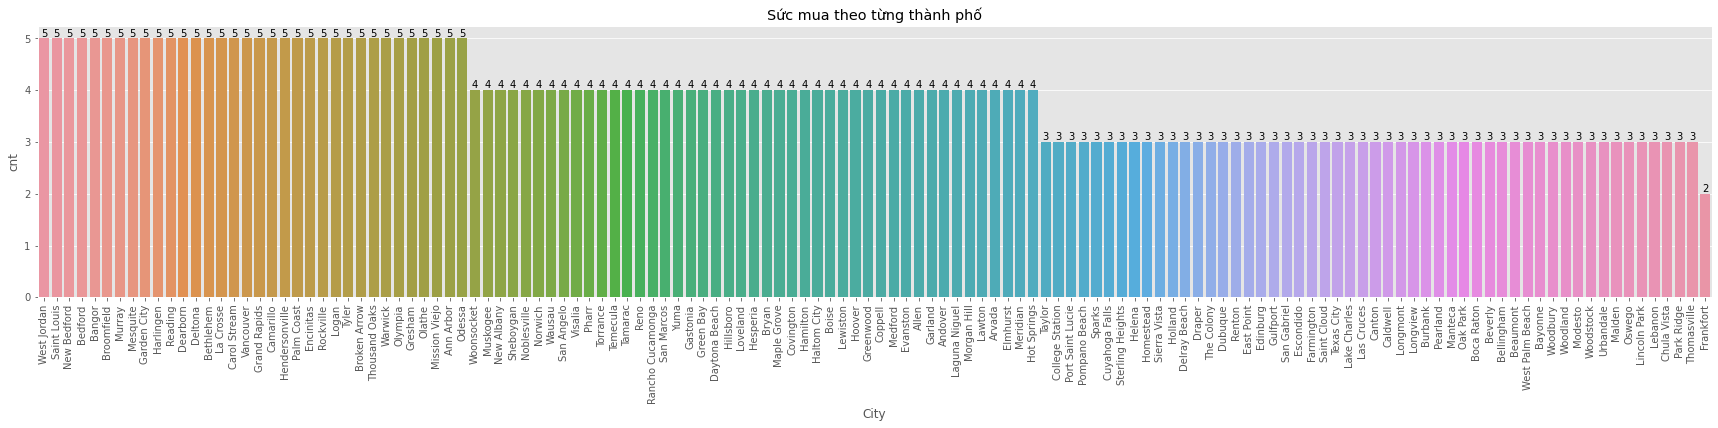

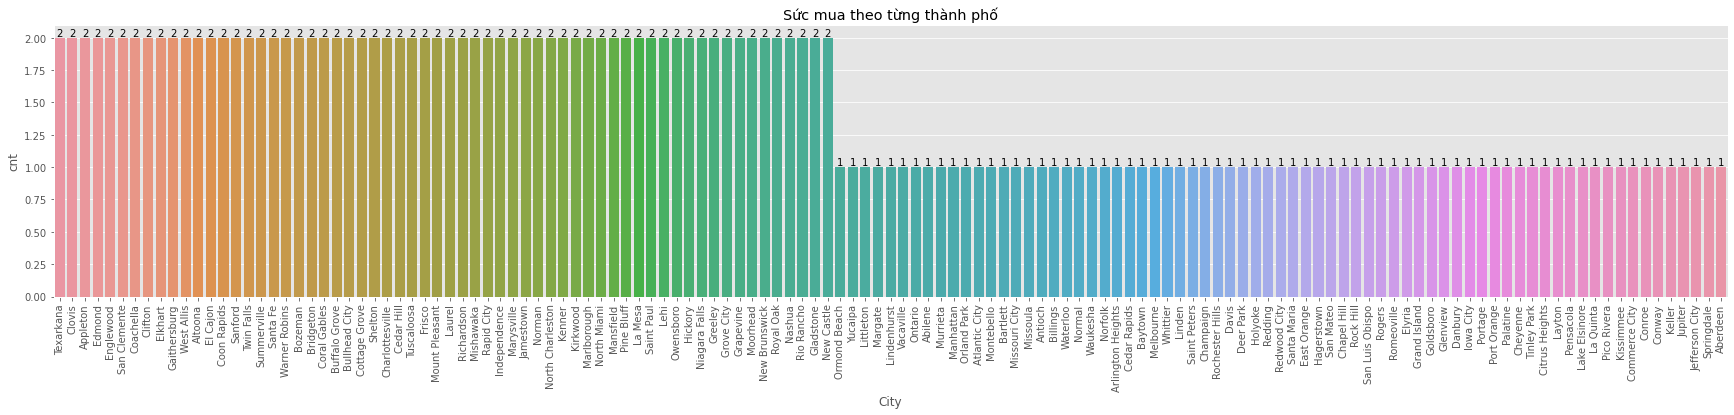

In [16]:
data = d_frame.groupby(['City'])['cnt'].sum().sort_values(ascending=False)
data = data.reset_index()

idx = int(len(data)/4)
start_idx = 0
end_idx = 0
for i in range(1, 5):
    if i == 4:
        end_idx = len(data)
    else:
      end_idx = idx*i
    dta = data[start_idx:end_idx]
    fig, ax = plt.subplots(figsize=(30,5))
    ax = sns.barplot(x = dta.City, y = dta.cnt, estimator=np.sum, ci = None, ax=ax)

    plt.bar_label(ax.containers[0])
    ax.set(title='Sức mua theo từng thành phố')
    ax.tick_params(axis='x', rotation=90)
    plt.show()
    start_idx = end_idx



#**3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất**

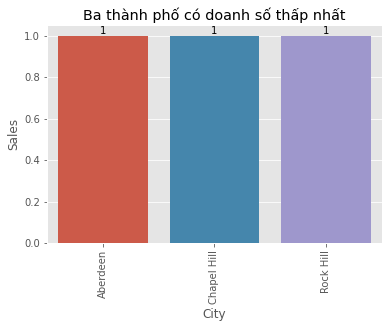

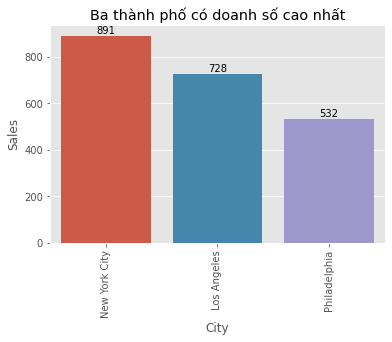

In [17]:
lowests = d_frame.groupby('City')['cnt'].sum().sort_values(ascending=True).head(3)
highests = d_frame.groupby('City')['cnt'].sum().sort_values(ascending=False).head(3)

lowests = lowests.reset_index()
ax = sns.barplot(x = lowests.City, y = lowests.cnt, estimator=np.sum, ci = None)

plt.bar_label(ax.containers[0])
ax.set(title='Ba thành phố có doanh số thấp nhất')
ax.set(xlabel='City', ylabel='Sales')
ax.tick_params(axis='x', rotation=90)
plt.show()


highests = highests.reset_index()
ax = sns.barplot(x = highests.City, y = highests.cnt, estimator=np.sum, ci = None)

plt.bar_label(ax.containers[0])
ax.set(title='Ba thành phố có doanh số cao nhất')
ax.set(xlabel='City', ylabel='Sales')
plt.xticks(rotation=90)
plt.show()


#**Tỉ trọng doanh số theo bang (state) và trung bình doanh số của 5 bang dẫn đầu về sức mua**

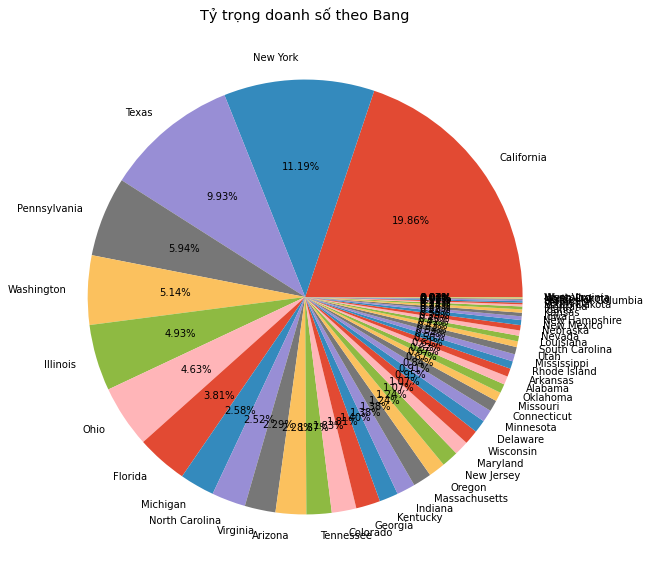

In [18]:
#data = d_frame.groupby("State").count().sort_values(ascending=False)
data = d_frame["State"].value_counts()

data.plot(kind = "pie",
          #colors = ["pink", "cyan", "palegreen", "lavender", "silver", "orange", "aqua", "crimson"],
          figsize = (12,10),
          ylabel='',
          title='Tỷ trọng doanh số theo Bang',
          autopct = "%.2f%%");

**Trung bình doanh số của 5 bang dẫn đầu về sức mua**

In [19]:
highest_5_states = d_frame.groupby('City')['cnt'].sum().sort_values(ascending=False).head(5).values.mean()
print('Trung bình doanh số của 5 bang dẫn đầu về sức mua: ' + str(highest_5_states))


Trung bình doanh số của 5 bang dẫn đầu về sức mua: 615.4


#**Các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).**

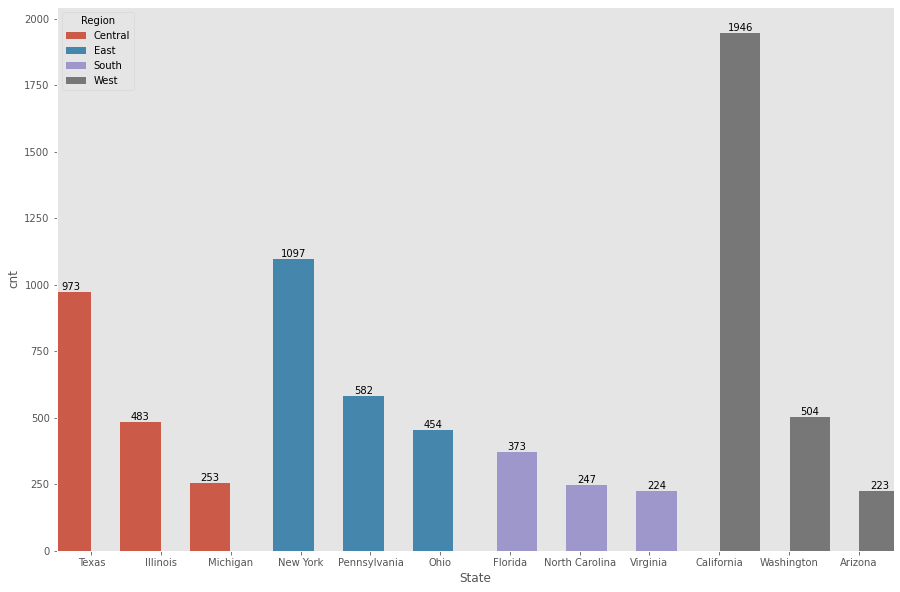

In [42]:
data = d_frame.groupby(["Region", 'State']).agg({'cnt':sum})
g = data['cnt'].groupby('Region', group_keys=False)
g = g.nlargest(3).reset_index()

plt.figure(figsize = (15,10))
ax = sns.barplot(x = g.State, y = g.cnt, hue = g.Region, ci = None, estimator=np.sum)
for i in ax.containers :
    plt.bar_label(i);

def width_changer(axi, new_value):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)


plt.legend(loc = 'upper left', title = 'Region')
width_changer(ax, .58)
ax.grid(axis='y')
plt.show()    

#**Top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.**

**Top 3 sản phẩm có doanh thu cao nhất**

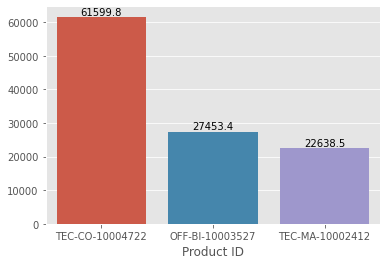

In [21]:
data = d_frame.groupby("Product ID").Sales.sum().sort_values(ascending=False)
ax = sns.barplot(x = data[:3].index, y = data[:3].values, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0]);
#ax.grid(axis='y')



**Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất**

[Text(0, 0, '19'), Text(0, 0, '18'), Text(0, 0, '16')]

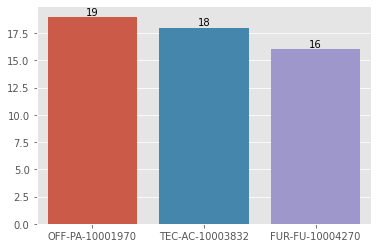

In [22]:
data = d_frame['Product ID'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x = data[:3].index, y = data[:3].values, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])

#**Biểu đồ thể hiện tỉ trọng doanh số của từng category.**

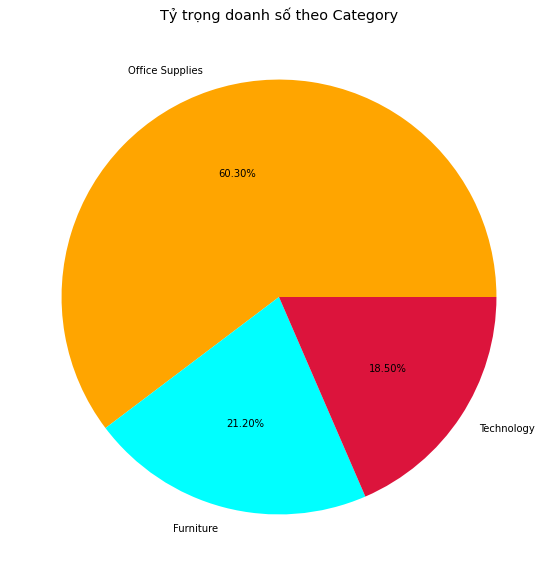

In [23]:
data = d_frame.groupby("Category").cnt.sum().sort_values(ascending=False)
#ax = sns.barplot(x = data.index, y = data.values)
data.plot(kind = "pie",
          colors = ["orange", "aqua", "crimson"],
          figsize = (12,10),
          ylabel='',
          title='Tỷ trọng doanh số theo Category',
          autopct = "%.2f%%");

#**Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..**

In [24]:
df_train = pd.read_csv('/content/dataset/train.csv')

In [25]:
df_train.columns = map(str.lower, df_train.columns)
print(df_train.columns)
df_train.columns = df_train.columns.str.replace(" ", "_")
df_train.columns = df_train.columns.str.replace("-", "_")
df_train.columns

furniture=df_train.loc[df_train['category'] == 'Furniture']
technology=df_train.loc[df_train['category'] == 'Technology']
office=df_train.loc[df_train['category'] == 'Office Supplies']

furniture= furniture.groupby('order_date')['sales'].sum().reset_index()

technology= technology.groupby('order_date')['sales'].sum().reset_index()
office= office.groupby('order_date')['sales'].sum().reset_index()

furniture = furniture.set_index('order_date')
furniture.index = pd.DatetimeIndex(furniture.index)

technology = technology.set_index('order_date')
technology.index = pd.DatetimeIndex(technology.index)

office = office.set_index('order_date')
office.index = pd.DatetimeIndex(office.index)

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales'],
      dtype='object')


In [26]:
df_furnit = furniture['sales'].resample('MS').mean()
df_tech = technology['sales'].resample('MS').mean()
df_offi = office['sales'].resample('MS').mean()

In [27]:
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

def performance2(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

In [28]:
train, test = np.array(df_furnit[:-12]), np.array(df_furnit[-12:])
train= train.reshape(-1,1)
test= test.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

n_input = 12
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=10)

**Hàm train và predict bằng mô hình Vanilla LTSM**

In [29]:
def train_model_and_predict_by_vanilla_ltsm(df_train, df_orig, n=1, weight_name='', epocs = 100, n_input = 12, n_features = 1):
  store= np.zeros((12,n))
  trained_model = "/content/trained_models/" + weight_name + "0.h5"
  if path.exists(trained_model):
    for i in range(n):
      trained_model_path = '/content/trained_models/' + weight_name + str(i) + '.h5'
      model_vanilla = Sequential()
      model_vanilla.add(LSTM(50, activation='relu', input_shape=(12, 1)))
        
      model_vanilla.add(Dense(100, activation='relu'))
      model_vanilla.add(Dense(100, activation='relu'))
      
      model_vanilla.add(Dense(1))
      model_vanilla.compile(optimizer='adam', loss='mse')
      model_vanilla.load_weights(trained_model_path)

      pred_list = []
      batch = df_train[-n_input:].reshape((1, n_input, n_features))
      for j in range(n_input):   
          pred_list.append(model_vanilla.predict(batch)[0]) 
          batch = np.append(batch[:,1:,:],[[pred_list[j]]],axis=1)

      df_predict_vanilla = pd.DataFrame(scaler.inverse_transform(pred_list),
                                index=df_furnit[-n_input:].index, columns=['Prediction'])
      
      store[:,i]=df_predict_vanilla['Prediction']
  else:
    for i in range(n):
        model_vanilla = Sequential()
        model_vanilla.add(LSTM(50, activation='relu', input_shape=(12, 1)))
        
        model_vanilla.add(Dense(100, activation='relu'))
        model_vanilla.add(Dense(100, activation='relu'))
        
        model_vanilla.add(Dense(1))
        model_vanilla.compile(optimizer='adam', loss='mse')
        
        model_vanilla.fit_generator(generator,epochs=epocs)
        trained_model_path = '/content/trained_models/' + weight_name + str(i) + '.h5'
        model_vanilla.save(trained_model_path)

        pred_list = []

        batch = df_train[-n_input:].reshape((1, n_input, n_features))

        for j in range(n_input):   
            pred_list.append(model_vanilla.predict(batch)[0]) 
            batch = np.append(batch[:,1:,:],[[pred_list[j]]],axis=1)

        df_predict_vanilla = pd.DataFrame(scaler.inverse_transform(pred_list),
                                  index=df_orig[-n_input:].index, columns=['Prediction'])
        
        store[:,i]=df_predict_vanilla['Prediction']
  return store

**Hàm train và predict bằng mô hình Stacked LTSM**

In [48]:
def train_model_and_predict_by_stacked_ltsm(df_train, df_orig, n=1, weight_name='', epocs = 200, n_input = 12, n_features = 1):
  store2= np.zeros((12,n))
  trained_model_path = "/content/trained_models/" + weight_name + "0.h5"
  if path.exists(trained_model_path):
    for i in range(n):
      trained_model_path = '/content/trained_models/' + weight_name + str(i) + '.h5'
      model_stacked = Sequential()            
      model_stacked.add(LSTM(50, activation='relu', return_sequences = True, input_shape=(12, 1)))
      model_stacked.add(LSTM(50, activation='relu'))
      model_stacked.add(Dense(100, activation='relu'))
      model_stacked.add(Dense(50, activation='relu'))
      model_stacked.add(Dense(1))
      model_stacked.compile(optimizer='adam', loss='mse')
      model_stacked.load_weights(trained_model_path)
      pred_list_s = []

      batch = df_train[-n_input:].reshape((1, n_input, n_features))

      for j in range(n_input):   
          pred_list_s.append(model_stacked.predict(batch)[0]) 
          batch = np.append(batch[:,1:,:],[[pred_list_s[j]]],axis=1)

      df_predict_stacked = pd.DataFrame(scaler.inverse_transform(pred_list_s),
                                index=df_orig[-n_input:].index, columns=['Prediction'])

      store2[:,i]=df_predict_stacked['Prediction']
  else:  
    for i in range(n):
        model_stacked = Sequential()            
        model_stacked.add(LSTM(50, activation='relu', return_sequences = True, input_shape=(12, 1)))
        model_stacked.add(LSTM(50, activation='relu'))
        model_stacked.add(Dense(100, activation='relu'))
        model_stacked.add(Dense(50, activation='relu'))
        model_stacked.add(Dense(1))
        model_stacked.compile(optimizer='adam', loss='mse')
        model_stacked.fit_generator(generator,epochs=epocs)
        trained_model_path = '/content/trained_models/' + weight_name + str(i) + '.h5'
        model_stacked.save(trained_model_path)
        pred_list_s = []

        batch = df_train[-n_input:].reshape((1, n_input, n_features))

        for j in range(n_input):   
            pred_list_s.append(model_stacked.predict(batch)[0]) 
            batch = np.append(batch[:,1:,:],[[pred_list_s[j]]],axis=1)

        df_predict_stacked = pd.DataFrame(scaler.inverse_transform(pred_list_s),
                                  index=df_orig[-n_input:].index, columns=['Prediction'])

        store2[:,i]=df_predict_stacked['Prediction']
  return store2

**Hàm hiển thị kết qủa dự báo**

In [31]:
def show_predic_result(df_predicted, df_orig, title='', predict_label='', xlabel ='Date', ylable=''):
  predict_result = np.zeros((df_predicted.shape[0],1))
  for i in range(df_predicted.shape[0]):
      predict_result[i] = np.mean(df_predicted[i,:])
  predict_result = predict_result.reshape((12,))

  rcParams['figure.figsize'] = 12, 8
  plt.plot(df_orig.index,df_orig,label="Observed",color='#2574BF')
  plt.plot(df_orig[36:].index,predict_result,label=predict_label)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylable)
  plt.legend()
  plt.show()

#**Train và dự báo cho danh mục Funiture**
>**Bằng mô hình Vanilla LSTM**

In [ ]:
store = train_model_and_predict_by_vanilla_ltsm(train, df_furnit, n=4, weight_name='trained_model_vanilla_ltsm_furniture', epocs = 200)

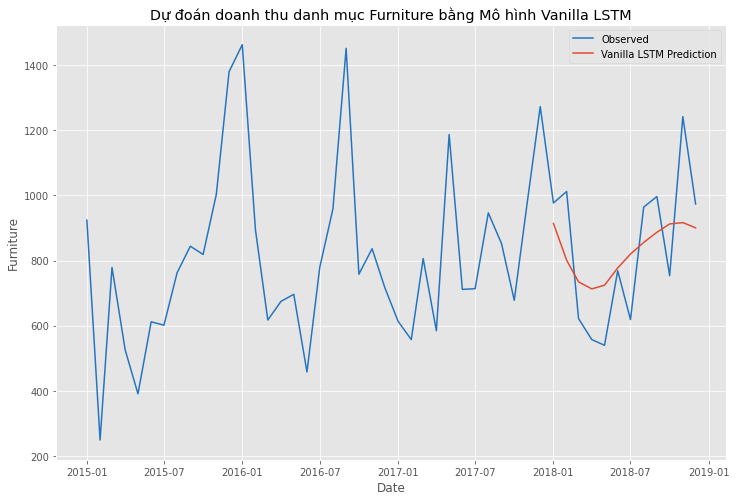

In [33]:
show_predic_result(store, df_furnit, title='Dự đoán doanh thu danh mục Furniture bằng Mô hình Vanilla LSTM',
                   predict_label='Vanilla LSTM Prediction', xlabel ='Date', ylable='Furniture')

>**Bằng mô hình Stacked LSTM**

In [ ]:
pred_reslt = train_model_and_predict_by_stacked_ltsm(train, df_furnit, n=4, weight_name='trained_model_stacked_ltsm_furniture')

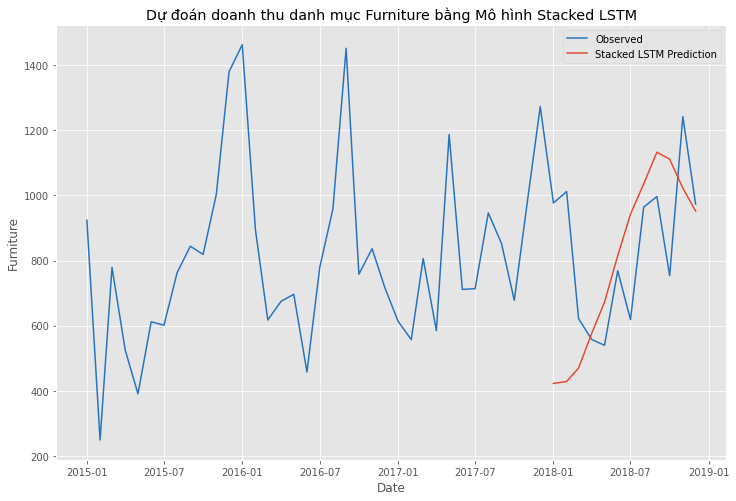

In [50]:
show_predic_result(pred_reslt, df_furnit, title='Dự đoán doanh thu danh mục Furniture bằng Mô hình Stacked LSTM',
                   predict_label='Stacked LSTM Prediction', xlabel ='Date', ylable='Furniture')

#**Train và dự báo cho danh mục Technical**

In [36]:
train_tech, test_tech = np.array(df_tech[:-12]), np.array(df_tech[-12:])
train_tech = train_tech.reshape(-1,1)
test_tech = test_tech.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_tech)
train_tech = scaler.transform(train_tech)
test_tech = scaler.transform(test_tech)

generator = TimeseriesGenerator(train_tech, train_tech, length=n_input, batch_size=10)

>**Bằng mô hình Vanilla LSTM**

In [ ]:
pred = train_model_and_predict_by_vanilla_ltsm(train_tech, df_tech, n=4, weight_name='trained_model_vanilla_ltsm_technical', epocs = 200)

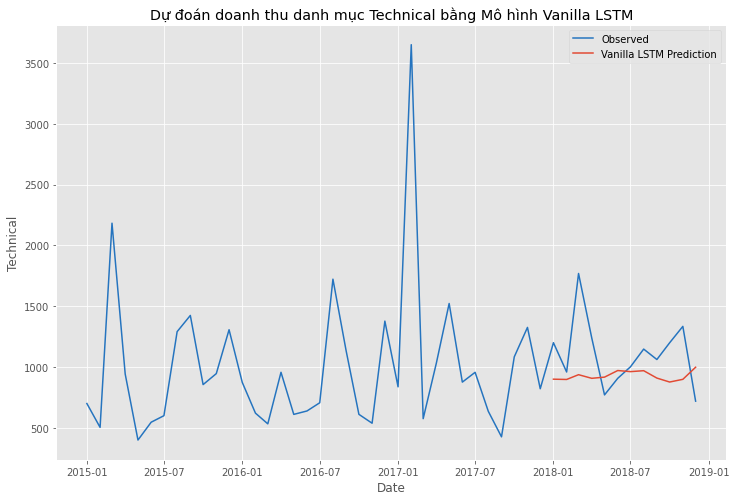

In [38]:
show_predic_result(pred, df_tech, title='Dự đoán doanh thu danh mục Technical bằng Mô hình Vanilla LSTM',
                   predict_label='Vanilla LSTM Prediction', xlabel ='Date', ylable='Technical')

>**Bằng mô hình Stacked LSTM**

In [ ]:
pred_stacked = train_model_and_predict_by_stacked_ltsm(train_tech, df_tech, n=3, weight_name='trained_model_spacked_ltsm_technical')

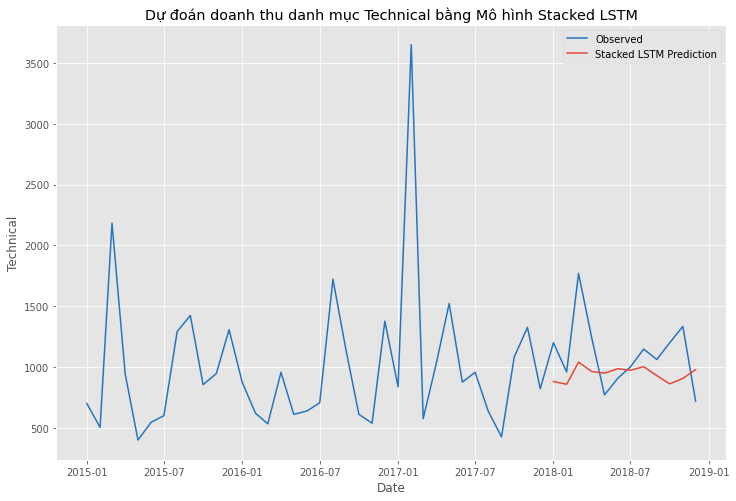

In [52]:
show_predic_result(pred_stacked, df_tech, title='Dự đoán doanh thu danh mục Technical bằng Mô hình Stacked LSTM',
                   predict_label='Stacked LSTM Prediction', xlabel ='Date', ylable='Technical')